# Simulation impot concubains avec enfants biologiques.

Data FISCI_BIOLOGIC_DESCENDANCE Taken originaly from biologic_child_tentative_2

In [1]:
year = 2013

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import sys

In [5]:
import sys
sys.path.append("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\optimisation_concubains")


In [6]:
import IRPP_from_scratch_2013 as ir

In [7]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/edp_2015_final.h5'
Store = pd.HDFStore(store_path)

In [8]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [9]:
hdf_path = ("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Programme\optimisation_concubains\Re_restart_from_scratch\\"
            + "Generated_hdf\optimizers.h5")

In [10]:
df = pd.read_hdf(hdf_path,  "optimizers_{}".format(year)).reset_index()

In [11]:
# path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
#                     "/Re_restart_from_scratch/pickle/optimize/")
# biologic = pickle.load(open(path+"biologic_2013.p", 'rb'))

In [12]:
biologic_path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
                "/Re_restart_from_scratch/pickle/biologic/biologic_households{}.p".format(2013))
biologic = pickle.load( 
        open(biologic_path, 'rb'))

In [ ]:
#Warning TODO: deleate
good_impot_path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
                    "/Re_restart_from_scratch/pickle/impot/match_ir{}.p".format(year))
biologic = pickle.load( 
        open(good_impot_path, 'rb'))

In [139]:
biologic.shape

(11624L,)

In [14]:
df['Biologic'] = df.ID_FISC_LOG_DIFF.isin(biologic)

In [15]:
df.Biologic.value_counts()

False    159268
True       5795
dtype: int64

In [16]:
df_fiscr = load_fisc_r_by_year(year)

In [17]:
print df_fiscr.AN_FISC.iloc[0]

2014


In [18]:
path = (u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/optimisation_concubains/" +
                    "Re_restart_from_scratch/pickle/optimize/")

In [19]:
mariage_id_2013_2014 = pickle.load(open(path+"marriage_en_2013_2014.p", 'rb'))
pacs_id_2013_2014 = pickle.load(open(path+"pacs_en_2013_2014.p", 'rb'))
separation_id_2013_2014 = pickle.load(open(path+"separation_en_2013_2014.p", 'rb'))


In [20]:
df.AN_FISC_x.iloc[0]

4028.0

In [21]:
df.reset_index(inplace = True)

In [22]:
df_2013 = df

In [23]:
df_2013['Mariage'] = df.ID_FISC_LOG_DIFF.isin(mariage_id_2013_2014)
df_2013['Pacs'] = df.ID_FISC_LOG_DIFF.isin(pacs_id_2013_2014)
df_2013['Separation'] = df.ID_FISC_LOG_DIFF.isin(separation_id_2013_2014)

In [24]:
df["Mar_Pacs"] = df['Mariage'] | df['Pacs'] ; df["Intersect"] = 1

In [25]:
df_2013.Mar_Pacs.value_counts()

False    162730
True       2333
dtype: int64

In [26]:
df = df_2013

In [27]:
(df.ID_FISC_LOG_DIFF.isin(mariage_id_2013_2014)).value_counts()

False    163718
True       1345
dtype: int64

In [28]:
len(mariage_id_2013_2014)

1345

In [29]:
(df.result_min_allocation<10).value_counts(normalize = True)

False    0.685169
True     0.314831
dtype: float64

In [30]:
df['Mariage'].value_counts()

False    163718
True       1345
dtype: int64

In [31]:
df.Do_not_optimize.value_counts(normalize=True)

False    0.711304
True     0.288696
dtype: float64

In [32]:
df[df.Biologic].Do_not_optimize.value_counts(normalize=True)

False    0.914064
True     0.085936
dtype: float64

In [33]:
df.Do_not_optimize_50_euros.value_counts(normalize=True)

False    0.749265
True     0.250735
dtype: float64

In [34]:
df[df.Biologic].Do_not_optimize_50_euros.value_counts(normalize=True)

False    0.929594
True     0.070406
dtype: float64

## Result stat descriptives

Qui n'optimise pas ?

In [35]:
%%time
df_2014 = pd.read_hdf(hdf_path,  "optimizers_{}".format(2014)).reset_index()
select_id_2014 = df_2014.ID_FISC_LOG_DIFF
df_fisci_2014 = load_fisc_i_by_year(2014); df_fisci_2014 = df_fisci_2014[df_fisci_2014.ID_FISC_LOG_DIFF.isin(select_id_2014)]
df_stat_des_2014 = pd.merge(df_fisci_2014, df_2014, on='ID_FISC_LOG_DIFF', how = 'left')
df_stat_des_2014["Age"] = 2015 - df_stat_des_2014.ANAIS_x
df_stat_des_2014["Biologic"] = df_stat_des_2014.ID_FISC_LOG_DIFF.isin(biologic)

Wall time: 1min 5s


In [36]:
%%time
df_2013 = pd.read_hdf(hdf_path,  "optimizers_{}".format(2013)).reset_index()
select_id_2013 = df_2013.ID_FISC_LOG_DIFF
df_fisci_2013 = load_fisc_i_by_year(2013); df_fisci_2013 = df_fisci_2013[df_fisci_2013.ID_FISC_LOG_DIFF.isin(select_id_2013)]
df_stat_des_2013 = pd.merge(df_fisci_2013, df_2013, on='ID_FISC_LOG_DIFF', how = 'left')
df_stat_des_2013["Age"] = 2014 - df_stat_des_2013.ANAIS_x
df_stat_des_2013["Biologic"] = df_stat_des_2013.ID_FISC_LOG_DIFF.isin(biologic)

Wall time: 29.7 s


#### Age moyen 

In [37]:
import seaborn as sns

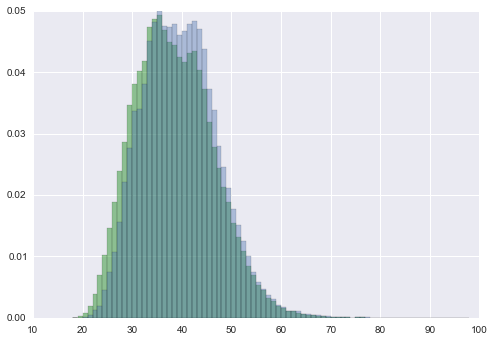

In [38]:
filter_declarant = df_stat_des_2014.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_stat_des_2014.Do_not_optimize_10_euros
bins = np.histogram(df_stat_des_2014[filter_declarant].Age, bins = (98-18))[1]
df_stat_des_2014[filter_declarant].Age.hist(bins = bins, normed = True, alpha = 0.4, color = 'g')
df_stat_des_2014[filter_declarant&(~filter_optimize)].Age.hist(bins = bins, normed = True, alpha = 0.4)



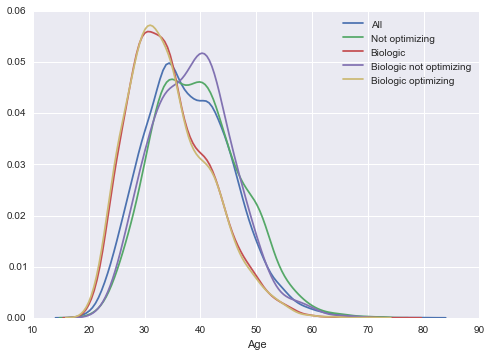

In [39]:
filter_declarant = df_stat_des_2014.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_stat_des_2014.Do_not_optimize_10_euros
filter_biologic = df_stat_des_2014.Biologic
sns.distplot(df_stat_des_2014[filter_declarant].Age.sample(10000), bins = bins, hist = False, label = 'All')
sns.distplot(df_stat_des_2014[filter_declarant&(~filter_optimize)].Age.sample(1000), bins = bins, hist = False, label = 'Not optimizing')
sns.distplot(df_stat_des_2014[filter_declarant
                            & filter_biologic 
                             ].Age, bins = bins, hist = False, label = 'Biologic' )
sns.distplot(df_stat_des_2014[filter_declarant
                            &(~filter_optimize)
                            & filter_biologic 
                             ].Age, bins = bins, hist = False, label = 'Biologic not optimizing')
sns.distplot(df_stat_des_2014[filter_declarant
                            &(filter_optimize)
                            & filter_biologic 
                             ].Age.sample(frac = 0.5), bins = bins, hist = False, label = 'Biologic optimizing')

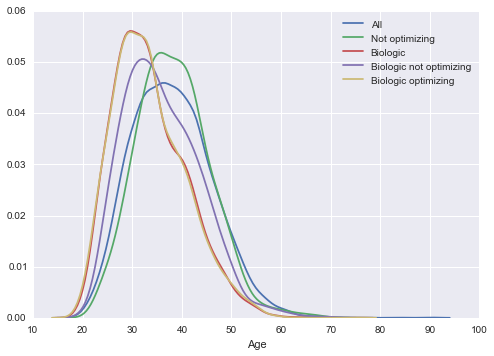

In [40]:
filter_declarant = df_stat_des_2013.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_stat_des_2013.Do_not_optimize_10_euros
filter_biologic = df_stat_des_2013.Biologic
sns.distplot(df_stat_des_2013[filter_declarant].Age.sample(10000), bins = bins, hist = False, label = 'All')
sns.distplot(df_stat_des_2013[filter_declarant&(~filter_optimize)].Age.sample(1000), bins = bins, hist = False, label = 'Not optimizing')
sns.distplot(df_stat_des_2013[filter_declarant
                            & filter_biologic 
                             ].Age, bins = bins, hist = False, label = 'Biologic' )
sns.distplot(df_stat_des_2013[filter_declarant
                            &(~filter_optimize)
                            & filter_biologic 
                             ].Age, bins = bins, hist = False, label = 'Biologic not optimizing')
sns.distplot(df_stat_des_2013[filter_declarant
                            &(filter_optimize)
                            & filter_biologic 
                             ].Age.sample(frac = 0.5), bins = bins, hist = False, label = 'Biologic optimizing')

####Distribution de revenus

In [41]:
filter_declarant = {2014 : df_stat_des_2014.TYPE_FISC.isin(["1"]) , 2013 : df_stat_des_2013.TYPE_FISC.isin(["1"])}
filter_optimize ={2014:  ~df_stat_des_2014.Do_not_optimize_10_euros,2013: ~df_stat_des_2013.Do_not_optimize_10_euros}
filter_biologic = {2014:df_stat_des_2014.Biologic, 2013:df_stat_des_2013.Biologic}

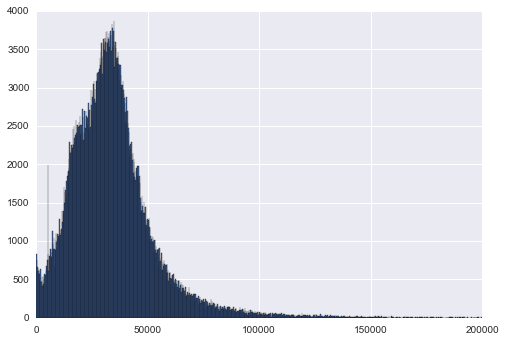

In [42]:
df_stat_des_2014.query('0<Rni<200000').Rni.hist(bins = 1000)

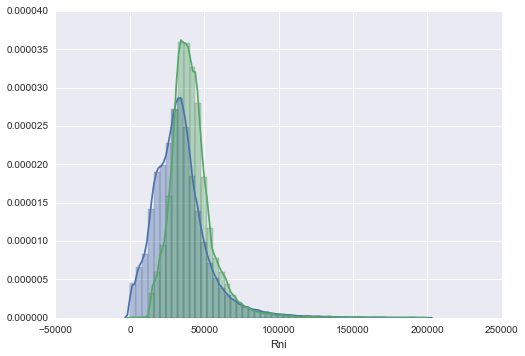

In [43]:
year= 2014
sns.distplot(df_stat_des_2014.query('0<Rni<200000').Rni)
sns.distplot(df_stat_des_2014[~filter_optimize[year]].query('0<Rni<200000').Rni)

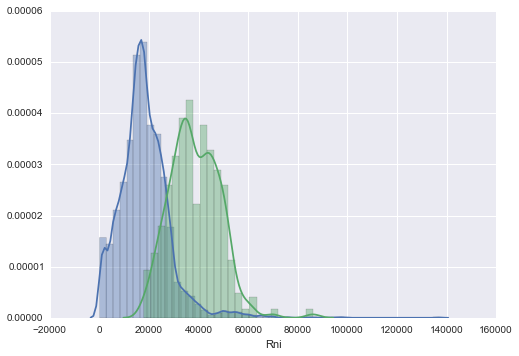

In [44]:
year= 2014
sns.distplot(df_stat_des_2014[filter_optimize[2014]& filter_biologic[2014]].query('0<Rni<200000').Rni, label = 'Biologic optimize')
sns.distplot(df_stat_des_2014[(~filter_optimize[year])& filter_biologic[2014]].query('0<Rni<200000').Rni,  label = 'Biologic do not optimize')

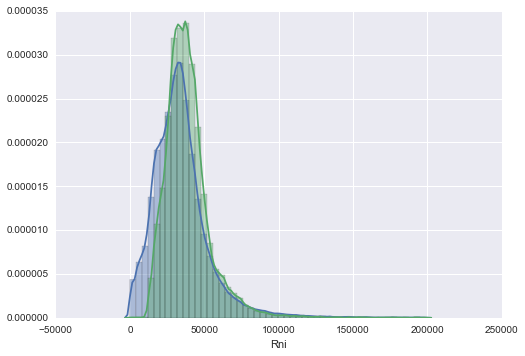

In [45]:
year= 2013
sns.distplot(df_stat_des_2013.query('0<Rni<200000').Rni)
sns.distplot(df_stat_des_2013[~filter_optimize[year]].query('0<Rni<200000').Rni)

Share of optimizer by centile

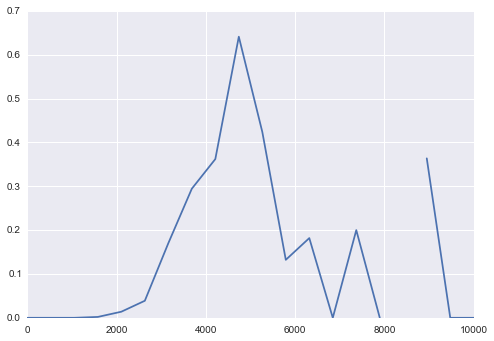

In [46]:
nb_bins = 20
values_1, bins = np.histogram(df_stat_des_2014[filter_biologic[2014]].query('0<Rni<100000').Rni, bins = nb_bins)

values_2 =  np.histogram(df_stat_des_2014[~filter_optimize[2014]&filter_biologic[2014]].query('0<Rni<100000').Rni, bins = bins)[0]
plt.plot(np.linspace(0,10**4,nb_bins),values_2/values_1)

In [47]:
df_stat_des_2014[filter_biologic[2014]].query('0<Rni<100000').Rni.shape

(22049L,)

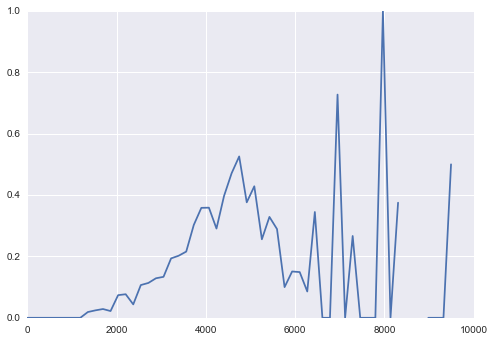

In [48]:
nb_bins = 60
values_1, bins = np.histogram(df_stat_des_2013[filter_biologic[2013]].query('0<Rni<100000').Rni, bins = nb_bins)

values_2 =  np.histogram(df_stat_des_2013[~filter_optimize[2013]&filter_biologic[2013]].query('0<Rni<100000').Rni, bins = bins)[0]
plt.plot(np.linspace(0,10**4,nb_bins),values_2/values_1)

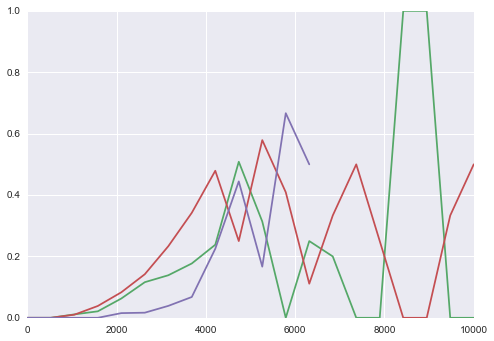

In [50]:
nb_bins = 20
for nb_enf in range(0,4):
    filter_nb_enf = df_stat_des_2013.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_stat_des_2013[filter_biologic[2013]&filter_nb_enf].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_stat_des_2013[~filter_optimize[2013]&filter_biologic[2013]&filter_nb_enf
                                             ].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(np.linspace(0,10**4,nb_bins),values_2/values_1)

Random

In [51]:
["Irpp_decote_allocation_{}_2013".format(allocation_number) for allocation_number in range(1,8)]

['Irpp_decote_allocation_1_2013',
 'Irpp_decote_allocation_2_2013',
 'Irpp_decote_allocation_3_2013',
 'Irpp_decote_allocation_4_2013',
 'Irpp_decote_allocation_5_2013',
 'Irpp_decote_allocation_6_2013',
 'Irpp_decote_allocation_7_2013']

In [52]:
df_stat_des_2013_dict = dict()
for nb_enf in range(1,9):#9):
    temp_df0 = df_stat_des_2013[df_stat_des_2013.Nb_enfants == nb_enf]
    temp_df = temp_df0[
                ["Irpp_decote_allocation_{}".format(allocation_number) for allocation_number in range(1,nb_enf+1+1)]
            ] #n+1 allocation range s'arrête avant 
    temp_df = temp_df[
                df_stat_des_2013.Nb_enfants == nb_enf][
                ["Irpp_decote_allocation_{}".format(allocation_number) for allocation_number in range(1,nb_enf+1+1)]
                ] #n+1 allocation range s'arrête avant
    
    matrix = np.matrix(temp_df)
    random_allocation_number = np.random.randint(low = 0, high=nb_enf, size = temp_df.shape[0])
    random_allocation_amount = np.array(matrix[np.arange(len(matrix)),random_allocation_number])[0]
    temp_df0['Selected_random_allocation_2013'] = random_allocation_number+1
    temp_df0["Random_allocation_amount_2013"] = random_allocation_amount
    
    df_stat_des_2013_dict[nb_enf] = temp_df0
    


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [53]:
df_optimize2 = pd.concat(df_stat_des_2013_dict)

In [54]:
df_optimize2["Random_optimize_10_euros"] = np.abs(df_optimize2.result_min_allocation - df_optimize2.Random_allocation_amount_2013)>10

In [55]:
df_stat_des_2013.Nb_enfants.value_counts()

2    287588
1    182400
3    106900
4     45048
5     12607
6     10152
7      3672
dtype: int64

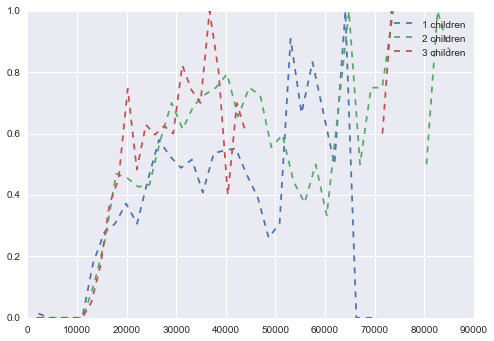

In [56]:
filter_declarant = df_optimize2.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_optimize2.Random_optimize_10_euros
filter_biologic = df_optimize2.Biologic
for nb_enf in range(1,4):
    nb_bins = 40
    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_optimize&filter_biologic
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[1:],values_2/values_1,'--', label = "{} children".format(nb_enf),)
plt.legend()

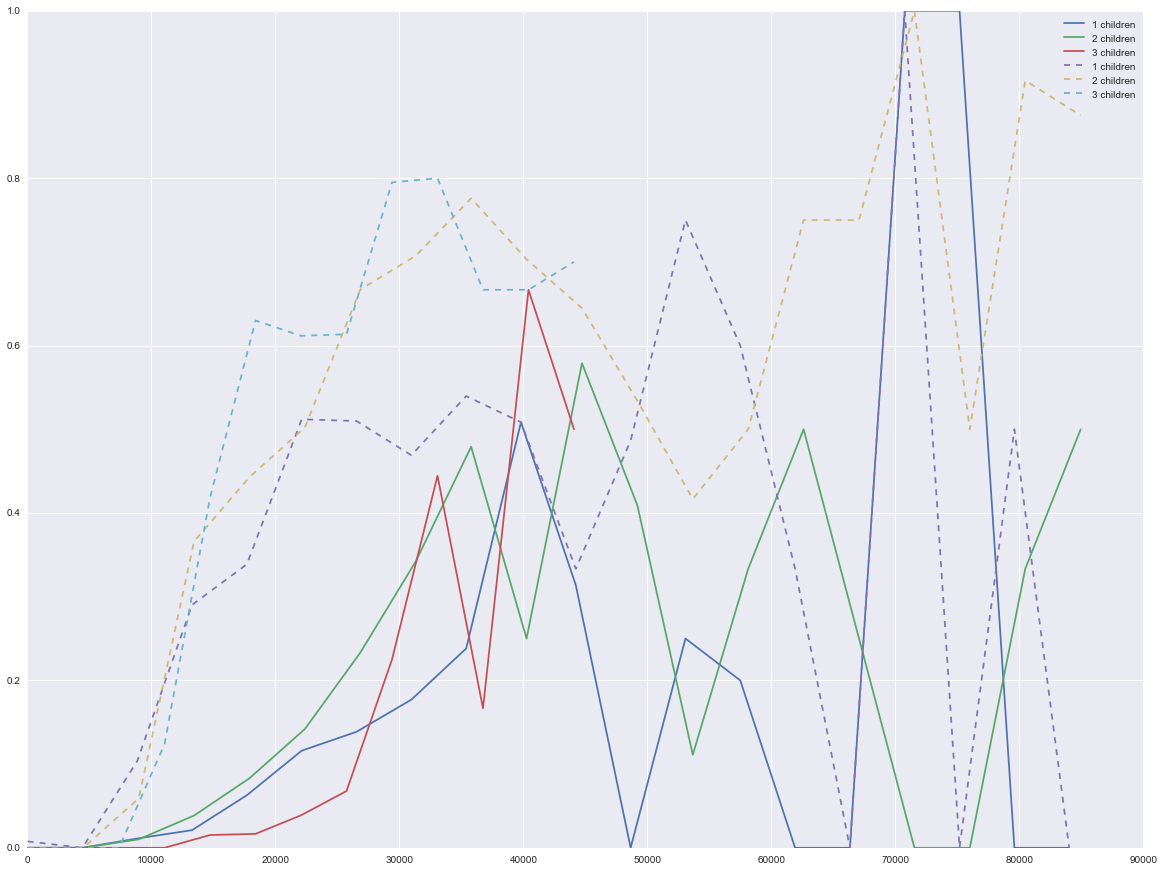

In [57]:
plt.figure(figsize=(20,15))

filter_declarant = df_optimize2.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_optimize2.Do_not_optimize_10_euros
filter_random_optimize = ~df_optimize2.Random_optimize_10_euros
filter_biologic = df_optimize2.Biologic


for nb_enf in range(1,4):
    nb_bins = 20
    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_optimize&filter_biologic
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1, label = "{} children".format(nb_enf),)



for nb_enf in range(1,4):

    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_random_optimize&filter_biologic
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1,'--', label = "{} children".format(nb_enf),)
    

plt.legend()

Wall time: 666 ms


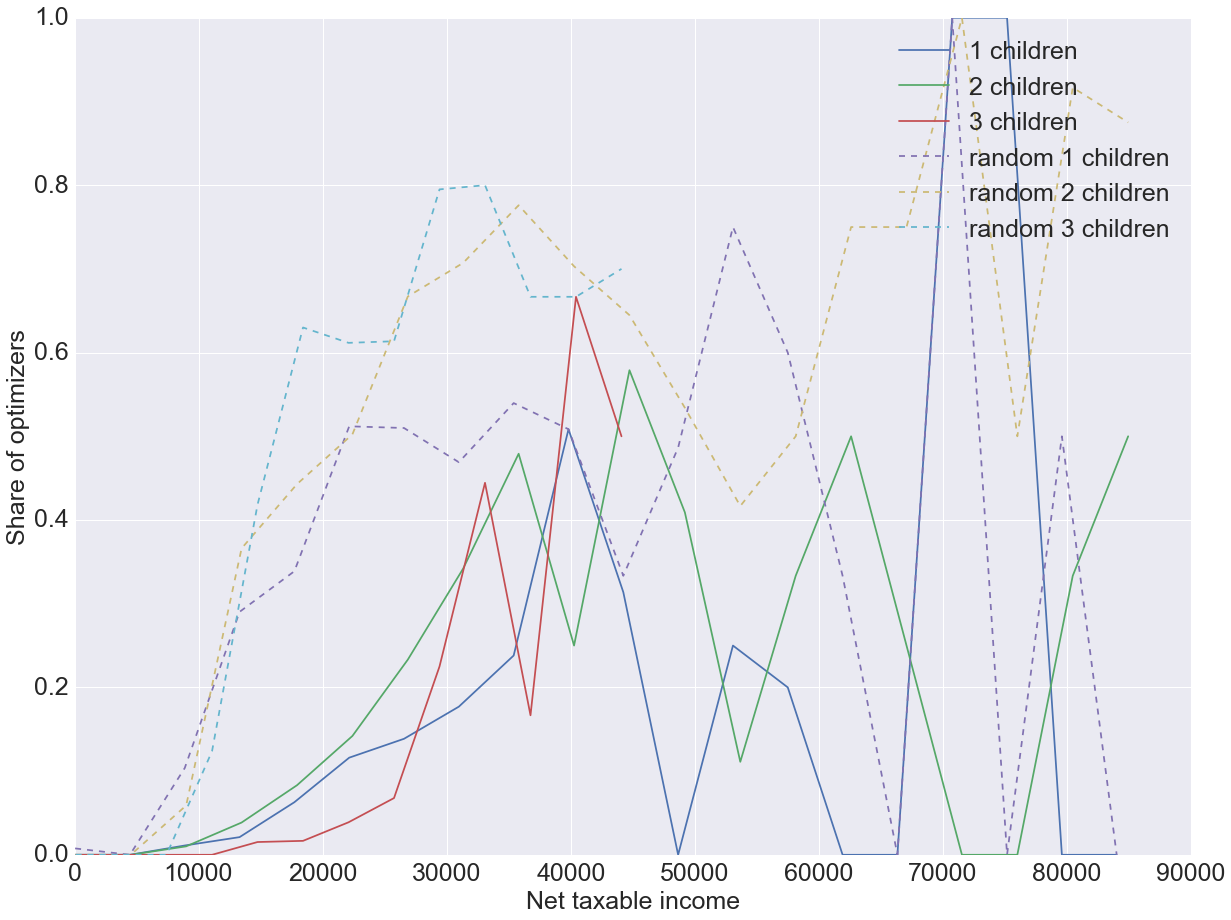

In [58]:

%%time
plt.figure(figsize=(20,15))

filter_declarant = df_optimize2.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_optimize2.Do_not_optimize_10_euros
filter_random_optimize = ~df_optimize2.Random_optimize_10_euros
filter_biologic = df_optimize2.Biologic


for nb_enf in range(1,4):
    nb_bins = 20
    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_optimize&filter_biologic
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1, label = "{} children".format(nb_enf),)



for nb_enf in range(1,4):

    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_random_optimize&filter_biologic
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1,'--', label = "random {} children".format(nb_enf),)
    #plt.vlines([48500, 30519,36443],0,1)
plt.tick_params(labelsize = 25)
plt.legend(fontsize = 25)
plt.xlabel("Net taxable income", fontsize = 25)
plt.ylabel("Share of optimizers", fontsize = 25)

Wall time: 613 ms


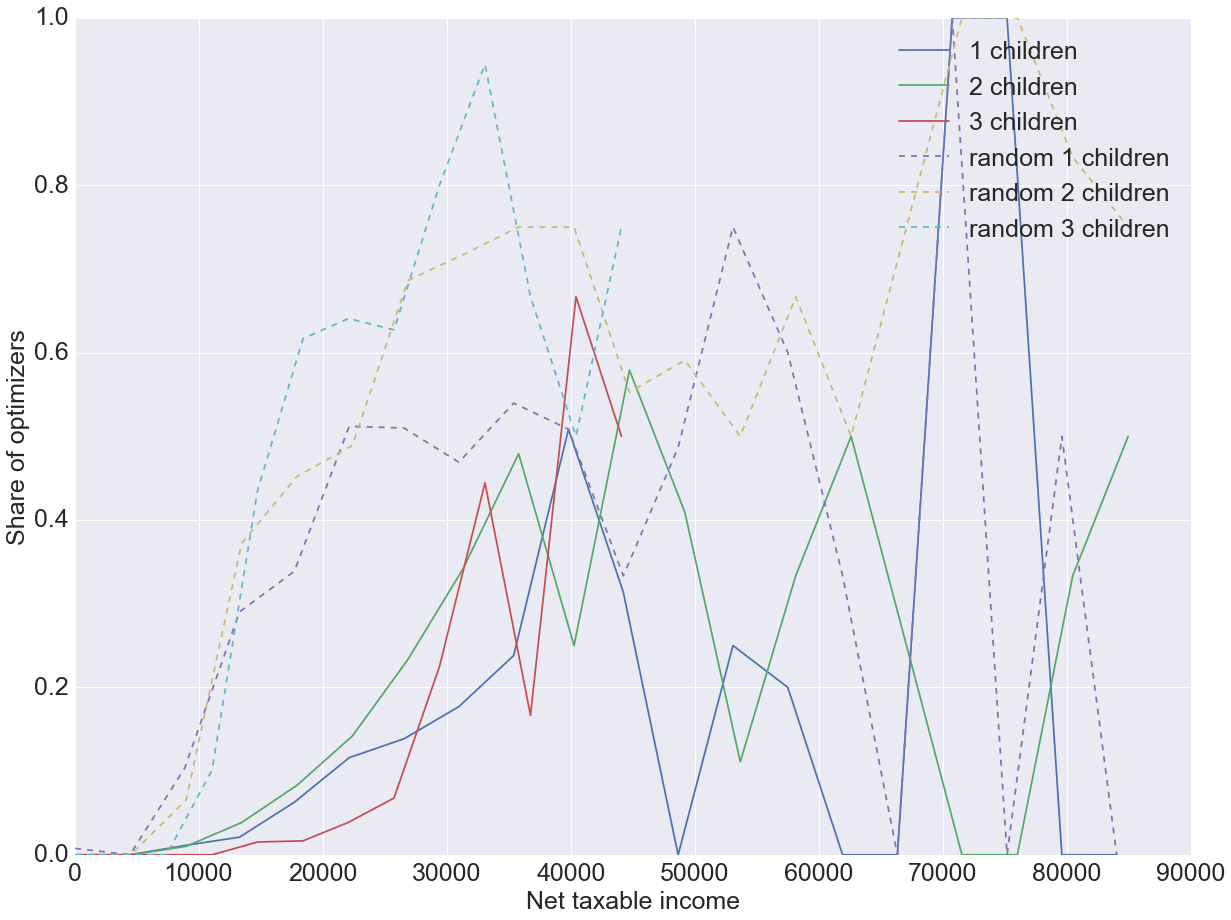

In [59]:

%%time
plt.figure(figsize=(20,15))

filter_declarant = df_optimize2.TYPE_FISC.isin(["1","2"])
filter_optimize = ~df_optimize2.Do_not_optimize_10_euros
filter_random_optimize = ~df_optimize2.Random_optimize_10_euros
filter_biologic = df_optimize2.Biologic


for nb_enf in range(1,4):
    nb_bins = 20
    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf& filter_declarant
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_optimize&filter_biologic& filter_declarant
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1, label = "{} children".format(nb_enf),)



for nb_enf in range(1,4):

    filter_enf = df_optimize2.Nb_enfants == nb_enf
    values_1, bins = np.histogram(df_optimize2[filter_biologic& filter_enf&filter_declarant
                                                  ].query('0<Rni<100000').Rni, bins = nb_bins)

    values_2 =  np.histogram(df_optimize2[~filter_random_optimize&filter_biologic&filter_declarant
                                             &filter_enf].query('0<Rni<100000').Rni, bins = bins)[0]
    plt.plot(bins[:-1],values_2/values_1,'--', label = "random {} children".format(nb_enf),)
    #plt.vlines([48500, 30519,36443],0,1)
plt.tick_params(labelsize = 25)
plt.legend(fontsize = 25)
plt.xlabel("Net taxable income", fontsize = 25)
plt.ylabel("Share of optimizers", fontsize = 25)

In [60]:
import openfisca_france


In [61]:
step = bins[3] - bins[2]
for value in bins:
    print value , "\n", df_optimize2.query("(Nb_enfants == 3 )& ({}<Rni< {} )".format(value, value+step)).Do_not_optimize_10_euros.value_counts(normalize = True)

59.0 
False    1
dtype: float64
3727.9 
False    0.998476
True     0.001524
dtype: float64
7396.8 
False    0.998715
True     0.001285
dtype: float64
11065.7 
False    0.935108
True     0.064892
dtype: float64
14734.6 
False    0.881207
True     0.118793
dtype: float64
18403.5 
False    0.800772
True     0.199228
dtype: float64
22072.4 
False    0.747678
True     0.252322
dtype: float64
25741.3 
False    0.646412
True     0.353588
dtype: float64
29410.2 
False    0.568797
True     0.431203
dtype: float64
33079.1 
False    0.578431
True     0.421569
dtype: float64
36748.0 
False    0.594575
True     0.405425
dtype: float64
40416.9 
False    0.566485
True     0.433515
dtype: float64
44085.8 
False    0.554172
True     0.445828
dtype: float64
47754.7 
True     0.517691
False    0.482309
dtype: float64
51423.6 
True     0.504425
False    0.495575
dtype: float64
55092.5 
True     0.5
False    0.5
dtype: float64
58761.4 
False    0.621723
True     0.378277
dtype: float64
62430.3 
False    0.

In [62]:
df_optimize2[filter_biologic& filter_enf
                                                  ].shape

(3655, 128)

In [64]:
df_optimize2["Random_fiscal_loss"] = df_optimize2.Random_allocation_amount_2013 - df_optimize2.result_min_allocation

### Averge fiscal loss by income

#### All

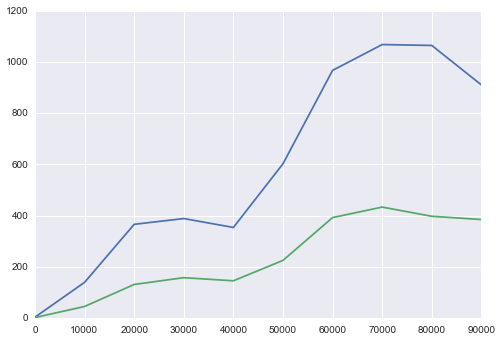

In [65]:
liste_perte_random = list()
liste_perte = list()
for rni in xrange(0,100000,10000):
    liste_perte_random.append(df_optimize2.query('{}<Rni<{}'.format(rni,rni+10000)).Random_fiscal_loss.mean())
    liste_perte.append(df_optimize2.query('{}<Rni<{}'.format(rni,rni+10000)).Fiscal_loss.mean())
plt.plot(xrange(0,100000,10000),liste_perte_random)
plt.plot(xrange(0,100000,10000),liste_perte)

Perte parmis les non optimiseurs

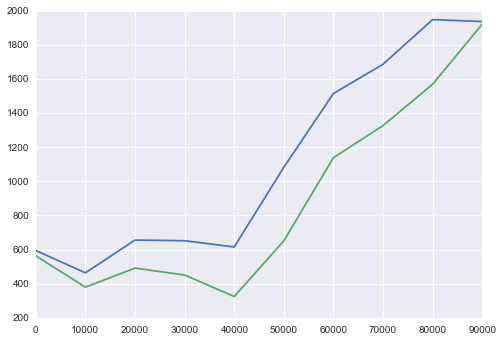

In [66]:
liste_perte_random = list()
liste_perte = list()
for rni in xrange(0,100000,10000):
    liste_perte_random.append(df_optimize2[~filter_random_optimize].query('{}<Rni<{}'.format(rni,rni+10000)).Random_fiscal_loss.mean())
    liste_perte.append(df_optimize2[~filter_optimize].query('{}<Rni<{}'.format(rni,rni+10000)).Fiscal_loss.mean())
plt.plot(xrange(0,100000,10000),liste_perte_random)
plt.plot(xrange(0,100000,10000),liste_perte)

In [67]:
df_optimize2[~filter_optimize&filter_biologic
                                             &filter_enf].query('{}<Rni<{}'.format(bins[5],bins[6])).shape

(10, 129)

In [68]:
df["Random_allocation"] =  df_stat_des_2013.Irpp_decote_allocation_1.describe()

In [69]:
df_stat_des_2014.Rni.max()

2940671.0

In [72]:
df_stat_des_2014[df_stat_des_2014.TYPE_FISC.isin(["1","2"])].Age.max()

98.0

In [74]:
df[df.Biologic].Do_not_optimize.value_counts(normalize=True)

False    0.914064
True     0.085936
dtype: float64

In [75]:
df_2014['Biologic'] = df_2014.ID_FISC_LOG_DIFF.isin(biologic)

In [76]:
df_2014[df_2014.Biologic].Do_not_optimize.value_counts(normalize=True)

False    0.957773
True     0.042227
dtype: float64

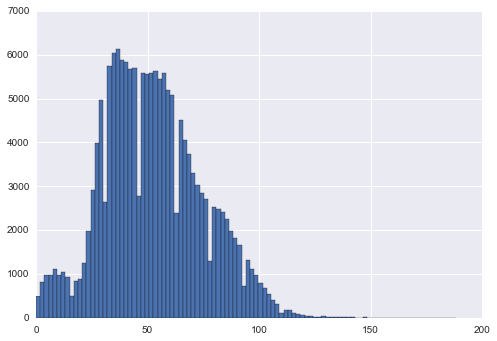

In [77]:
df_2014.Age.hist(bins = 100)

In [81]:
Logit = sm.Logit(df["Mar_Pacs"], df[[  "Do_not_optimize_10_euros", 'Intersect' ]].astype("int")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.074214
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:               165063
Model:                          Logit   Df Residuals:                   165061
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:               0.0002497
Time:                        15:23:46   Log-Likelihood:                -12250.
converged:                       True   LL-Null:                       -12253.
                                        LLR p-value:                   0.01337
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Do_not_optimize_10_euros    -0.1172      0.048     -2.451      0.014        -0.211    -0.023
Intersect                   -4.2137      0.024   -174.382      0.000        -4.261    -4.166
============================================================================================
"""

In [82]:
df["hello"] = (df.Do_not_optimize_90_prct_tax_amount & df.Do_not_optimize_100_euros)

(0, 2000)

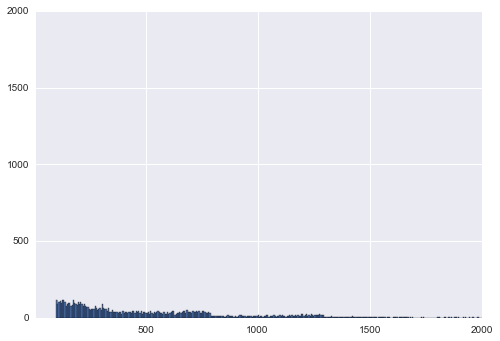

In [83]:
#df.Fiscal_loss.hist(bins = 1000)
df[(df.Do_not_optimize_90_prct_tax_amount & df.Do_not_optimize_100_euros)].Fiscal_loss.hist(bins = 1000)
plt.xlim(10,2000)
plt.ylim(0,2000)

In [84]:
Logit = sm.Logit(df["Mar_Pacs"], df[[ "result_min_allocation", "Rni","hello", "Age", "Intersect"]].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.073063
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:               165063
Model:                          Logit   Df Residuals:                   165058
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.01575
Time:                        15:23:50   Log-Likelihood:                -12060.
converged:                       True   LL-Null:                       -12253.
                                        LLR p-value:                 2.885e-82
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
result_min_allocation -4.012e-05   5.09e-06     -7.888      0.000     -5.01e-05 -3.02e-05
Rni                    1.819e-05   1.63e-06     11.159      0.000       1.5e-05  2.14e-05
hello                    -0.7438      0.138     -5.407      0.000        -1.013    -0.474
Age                      -0.0150      0.001    -15.228      0.000        -0.017    -0.013
Intersect                -4.0639      0.069    -58.751      0.000        -4.199    -3.928
=========================================================================================
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000CDFC79E8>]], dtype=object)

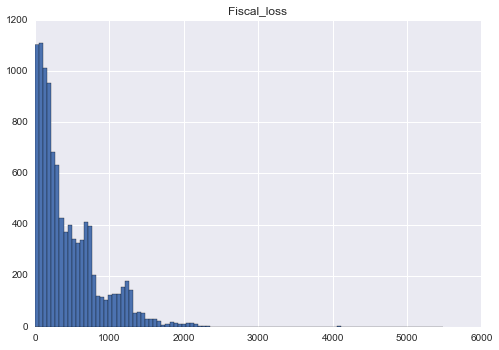

In [85]:
df[df.Do_not_optimize_90_prct_tax_amount == True][[ "Fiscal_loss"]].hist(bins = 100)

In [87]:
for col in df.columns: print col

index
level_0
ID_FISC_LOG_DIFF
ANAIS
AN_FISC_x
AN_FISC_y
Age
CNE1
COM_NSCAT
COM_SCAT1
COM_SCAT2
DACOED
DACOEP
Decote
Fiscal_loss
Gain_fiscal_max
ID_DIFF
ID_FISC_FOY_DIFF
I_FISC_LOGEMENT
I_FISC_REVENU
Irpp_ac_plaf_qf
Irpp_ac_qf
Irpp_decote
Irpp_decote_allocation_1
Irpp_decote_allocation_2
Irpp_decote_allocation_3
Irpp_decote_allocation_4
Irpp_decote_allocation_5
Irpp_decote_allocation_6
Irpp_decote_allocation_7
Irpp_decote_allocation_8
Irpp_decote_allocation_9
Irpp_decote_seuil_prel_allocation_1
Irpp_decote_seuil_prel_allocation_2
Irpp_decote_seuil_prel_allocation_3
Irpp_decote_seuil_prel_allocation_4
Irpp_decote_seuil_prel_allocation_5
Irpp_decote_seuil_prel_allocation_6
Irpp_decote_seuil_prel_allocation_7
Irpp_decote_seuil_prel_allocation_8
Irpp_decote_seuil_prel_allocation_9
Irpp_reduction_impot_etudes
Irpp_reduction_impot_etudes_seuil
Irpp_seuil_prelevement
Irpp_ss_qf
JNAIS
MNAIS
Nb_enf_allocation_1
Nb_enf_allocation_2
Nb_enf_allocation_3
Nb_enf_allocation_4
Nb_enf_allocation_5
Nb_e

In [88]:
df_reg = df.query('(40000<Rni)')
Logit = sm.Logit(df_reg["Mar_Pacs"], df_reg[[ "result_min_allocation", "Rni", "Do_not_optimize_0_5_prct_income_share","Fiscal_loss", "Age", "Intersect"]].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.086111
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:                49015
Model:                          Logit   Df Residuals:                    49009
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.01314
Time:                        15:23:54   Log-Likelihood:                -4220.7
converged:                       True   LL-Null:                       -4276.9
                                        LLR p-value:                 1.285e-22
=========================================================================================================
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
result_min_allocation                   9.58e-06   9.35e-06      1.024      0.306     -8.75e-06  2.79e-05
Rni                                   -2.869e-06      4e-06     -0.718      0.473     -1.07e-05  4.97e-06
Do_not_optimize_0_5_prct_income_share    -0.0237      0.145     -0.163      0.871        -0.309     0.261
Fiscal_loss                              -0.0003      0.000     -2.418      0.016        -0.001 -5.78e-05
Age                                      -0.0151      0.002     -9.528      0.000        -0.018    -0.012
Intersect                                -3.0616      0.195    -15.670      0.000        -3.444    -2.679
=========================================================================================================
"""

In [89]:
df_reg.shape

(49015, 106)

In [90]:
Logit = sm.Logit(df["Mar_Pacs"], df[["result_min_allocation", "Rni", "Do_not_optimize_0_5_prct_income_share","Fiscal_loss", "Age","Nb_enfants", "Intersect" ]].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.071332
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:               165063
Model:                          Logit   Df Residuals:                   165056
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.03907
Time:                        15:23:56   Log-Likelihood:                -11774.
converged:                       True   LL-Null:                       -12253.
                                        LLR p-value:                1.392e-203
=========================================================================================================
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
result_min_allocation                 -5.034e-05   7.37e-06     -6.831      0.000     -6.48e-05 -3.59e-05
Rni                                    2.133e-05   2.01e-06     10.587      0.000      1.74e-05  2.53e-05
Do_not_optimize_0_5_prct_income_share    -0.0330      0.091     -0.363      0.717        -0.211     0.145
Fiscal_loss                              -0.0002      0.000     -2.072      0.038        -0.000  -1.2e-05
Age                                      -0.0198      0.001    -19.035      0.000        -0.022    -0.018
Nb_enfants                               -0.6732      0.032    -21.170      0.000        -0.736    -0.611
Intersect                                -2.7716      0.094    -29.532      0.000        -2.956    -2.588
=========================================================================================================
"""

In [91]:
Logit = sm.Logit(df["Separation"], df[[ "Rni", "Do_not_optimize_0_5_prct_income_share","Fiscal_loss", "Age","Nb_enfants", "Intersect" ]].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.034713
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Separation   No. Observations:               165063
Model:                          Logit   Df Residuals:                   165057
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.05167
Time:                        15:23:56   Log-Likelihood:                -5729.8
converged:                       True   LL-Null:                       -6042.0
                                        LLR p-value:                1.106e-132
=========================================================================================================
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Rni                                    4.865e-06   7.79e-07      6.249      0.000      3.34e-06  6.39e-06
Do_not_optimize_0_5_prct_income_share    -0.1459      0.131     -1.118      0.264        -0.402     0.110
Fiscal_loss                               0.0002      0.000      1.149      0.251        -0.000     0.000
Age                                      -0.0191      0.002    -11.987      0.000        -0.022    -0.016
Nb_enfants                               -1.0862      0.057    -19.082      0.000        -1.198    -0.975
Intersect                                -2.5939      0.122    -21.231      0.000        -2.833    -2.354
=========================================================================================================
"""

In [93]:
1/np.exp(-0.0341)

1.0346880703618861

In [94]:
1/np.exp((-0.0012)*100)

1.1274968515793757

In [95]:
Logit = sm.Logit(df.sample(frac=0.1, random_state=42)["Mar_Pacs"], 
                 df.sample(frac=0.1, random_state=42)[["Intersect","result_min_allocation", "Rni", "Do_not_optimize_0_5_prct_income_share", "Age","Nb_enfants" ]].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.071948
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:                16506
Model:                          Logit   Df Residuals:                    16500
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.05270
Time:                        15:23:58   Log-Likelihood:                -1187.6
converged:                       True   LL-Null:                       -1253.6
                                        LLR p-value:                 8.350e-27
=========================================================================================================
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intersect                                -2.6639      0.306     -8.716      0.000        -3.263    -2.065
result_min_allocation                 -9.482e-05   3.45e-05     -2.750      0.006        -0.000 -2.72e-05
Rni                                    3.206e-05   7.57e-06      4.234      0.000      1.72e-05  4.69e-05
Do_not_optimize_0_5_prct_income_share    -0.0509      0.182     -0.279      0.780        -0.408     0.306
Age                                      -0.0232      0.003     -7.038      0.000        -0.030    -0.017
Nb_enfants                               -0.8391      0.106     -7.922      0.000        -1.047    -0.632
=========================================================================================================
"""

(0, 2000)

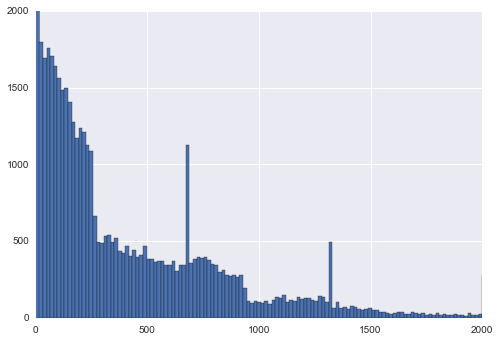

In [101]:
df.Fiscal_loss.hist(bins = 1000)
plt.xlim(0,2000)
plt.ylim(0,2000)

(0, 2000)

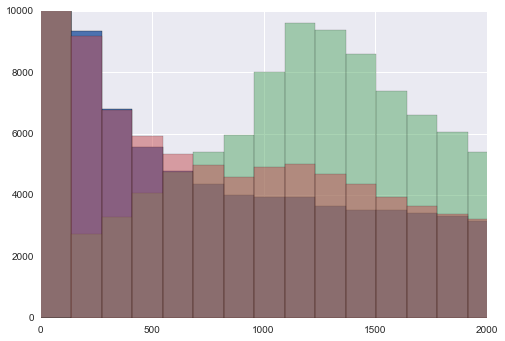

In [102]:
df.result_min_allocation.hist(bins = 10000)
df.result_max_allocation.hist(bins = 10000, alpha = 0.5)
df.Irpp_decote.hist(bins = 10000, alpha = 0.5)
plt.ylim(0,10000)
plt.xlim(0,2000)

In [103]:
df["Pay_but_coul_not"] = (df.Irpp_decote >0) & (df.result_min_allocation == 0); print df.Pay_but_coul_not.value_counts()
df["Cant_pay"] = (df.result_max_allocation == 0) ; print df.Cant_pay.value_counts()
df["Could_pay_but_do_not"] =  (df.Irpp_decote == 0) & (df.result_max_allocation>0); print df.Could_pay_but_do_not.value_counts()
df["Do_not_pay"]  =  (df.Irpp_decote < 1); print df.Do_not_pay.value_counts(normalize=True)

False    156355
True       8708
dtype: int64
False    145826
True      19237
dtype: int64
False    141755
True      23308
dtype: int64
False    0.741789
True     0.258211
dtype: float64


In [112]:
(df.Do_not_optimize_100_euros& df.Separation).value_counts()

False    164860
True        203
dtype: int64

In [ ]:
df.S

In [110]:
frac =1
random_state = np.random.randint(0,10**8)
df2 = df[df.result_min_allocation !=0]
df2["Fiscal_loss_divided_1000"] = df2.Fiscal_loss / 1000
df2["Rni_divided_10000"] = df2.Rni / 10000
df_enfant_dummies =pd.get_dummies(df2.Nb_enfants, prefix = "enfants"); enfants_cols = list(df_enfant_dummies.columns)
df2 = df2.merge(df_enfant_dummies, left_index=True, right_index=True)

Neg_binom = sm.GLM(df2.sample(frac=frac, random_state=random_state)["Separation"], 
                 df2.sample(frac=frac, random_state=random_state)[
            ['Intersect',"result_min_allocation", "Rni_divided_10000","Do_not_optimize",
             "Fiscal_loss_divided_1000", "Age", ]+enfants_cols[1:]
    ].astype("float"), family=sm.families.Binomial(),).fit()
Neg_binom.summary()

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Separation   No. Observations:               113810
Model:                            GLM   Df Residuals:                   113798
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -5019.4
Date:                Thu, 01 Feb 2018   Deviance:                       10039.
Time:                        15:39:45   Pearson chi2:                 1.16e+05
No. Iterations:                    26                                         
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intersect                   -4.1116      0.145    -28.446      0.000        -4.395    -3.828
result_min_allocation    -5.565e-05   9.45e-06     -5.890      0.000     -7.42e-05 -3.71e-05
Rni_divided_10000            0.2517      0.035      7.178      0.000         0.183     0.320
Do_not_optimize             -0.0782      0.089     -0.876      0.381        -0.253     0.097
Fiscal_loss_divided_1000    -0.0728      0.121     -0.601      0.548        -0.311     0.165
Age                         -0.0210      0.002    -12.453      0.000        -0.024    -0.018
enfants_2                   -1.1436      0.077    -14.781      0.000        -1.295    -0.992
enfants_3                   -2.4378      0.274     -8.883      0.000        -2.976    -1.900
enfants_4                   -2.1031      0.516     -4.078      0.000        -3.114    -1.092
enfants_5                  -23.9620   4.84e+04     -0.000      1.000     -9.48e+04  9.48e+04
enfants_6                  -24.2276   8.17e+04     -0.000      1.000      -1.6e+05   1.6e+05
enfants_7                  -24.5941    2.6e+05  -9.46e-05      1.000      -5.1e+05   5.1e+05
============================================================================================
"""

In [114]:
frac =1
random_state = np.random.randint(0,10**8)
df2 = df[df.result_min_allocation !=0]
df2 = df2[df2.Nb_enfants<6]
df2["Fiscal_loss_divided_1000"] = df2.Fiscal_loss / 1000
df2["Rni_divided_10000"] = df2.Rni / 10000
df_enfant_dummies =pd.get_dummies(df2.Nb_enfants, prefix = "enfants"); enfants_cols = list(df_enfant_dummies.columns)
df2 = df2.merge(df_enfant_dummies, left_index=True, right_index=True)

Neg_binom = sm.GLM(df2.sample(frac=frac, random_state=random_state)["Mar_Pacs"], 
                 df2.sample(frac=frac, random_state=random_state)[
            ['Intersect',"result_min_allocation", "Rni_divided_10000"
             ,"Fiscal_loss_divided_1000", "Age", ]+enfants_cols[1:]
    ].astype("float"), family=sm.families.Binomial(),).fit()
Neg_binom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Mar_Pacs   No. Observations:               113756
Model:                            GLM   Df Residuals:                   113746
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9638.8
Date:                Thu, 01 Feb 2018   Deviance:                       19278.
Time:                        15:42:21   Pearson chi2:                 1.14e+05
No. Iterations:                    10                                         
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intersect                   -3.0636      0.099    -31.075      0.000        -3.257    -2.870
result_min_allocation    -2.469e-05   6.31e-06     -3.915      0.000     -3.71e-05 -1.23e-05
Rni_divided_10000            0.1163      0.024      4.805      0.000         0.069     0.164
Do_not_optimize             -0.0856      0.061     -1.398      0.162        -0.206     0.034
Fiscal_loss_divided_1000    -0.1755      0.089     -1.969      0.049        -0.350    -0.001
Age                         -0.0193      0.001    -17.133      0.000        -0.022    -0.017
enfants_2                   -0.6412      0.049    -13.007      0.000        -0.738    -0.545
enfants_3                   -1.7678      0.156    -11.297      0.000        -2.075    -1.461
enfants_4                   -1.6193      0.341     -4.746      0.000        -2.288    -0.950
enfants_5                   -1.6044      1.007     -1.593      0.111        -3.579     0.370
============================================================================================
"""

In [ ]:
frac =1
random_state = np.random.randint(0,10**8)
df2 = df[df.result_min_allocation !=0]
df2 = df2[df2.Nb_enfants<6]
df2["Fiscal_loss_divided_1000"] = df2.Fiscal_loss / 1000
df2["Rni_divided_10000"] = df2.Rni / 10000
df_enfant_dummies =pd.get_dummies(df2.Nb_enfants, prefix = "enfants"); enfants_cols = list(df_enfant_dummies.columns)
df2 = df2.merge(df_enfant_dummies, left_index=True, right_index=True)

Neg_binom = sm.GLM(df2.sample(frac=frac, random_state=random_state)["Mar_Pacs"], 
                 df2.sample(frac=frac, random_state=random_state)[
            ['Intersect',"result_min_allocation", "Rni_divided_10000"
             ,"Fiscal_loss_divided_1000", "Age", ]+enfants_cols[1:]
    ].astype("float"), family=sm.families.Binomial(),).fit()
Neg_binom.summary()

In [115]:
df2["Separation"] = df2.Separation.astype('float')

In [129]:
frac =1
random_state = np.random.randint(0,10**8)
df2 = df[df.result_max_allocation !=0]
df2 = df2[df2.Nb_enfants<5]
df2["Fiscal_loss_divided_1000"] = df2.Fiscal_loss / 1000
df2["Rni_divided_10000"] = df2.Rni / 10000
df_enfant_dummies =pd.get_dummies(df2.Nb_enfants, prefix = "enfants"); enfants_cols = list(df_enfant_dummies.columns)
df2 = df2.merge(df_enfant_dummies, left_index=True, right_index=True)
Logit = sm.Logit(df2.sample(frac=frac, random_state=random_state)["Separation"], 
                 df2.sample(frac=frac, random_state=random_state)[
            ['Intersect', "Rni_divided_10000", "Do_not_optimize"
             , "Age",  ] + enfants_cols[1:]
    ].astype("float")).fit()
Logit.summary()

Optimization terminated successfully.
         Current function value: 0.038447
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Separation   No. Observations:               143680
Model:                          Logit   Df Residuals:                   143673
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 0.04591
Time:                        15:50:16   Log-Likelihood:                -5524.0
converged:                       True   LL-Null:                       -5789.9
                                        LLR p-value:                1.268e-111
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intersect            -3.5502      0.094    -37.941      0.000        -3.734    -3.367
Rni_divided_10000     0.0360      0.008      4.422      0.000         0.020     0.052
Do_not_optimize      -0.0827      0.072     -1.153      0.249        -0.223     0.058
Age                  -0.0191      0.002    -11.833      0.000        -0.022    -0.016
enfants_2            -1.0438      0.071    -14.622      0.000        -1.184    -0.904
enfants_3            -2.3916      0.218    -10.992      0.000        -2.818    -1.965
enfants_4            -2.4847      0.381     -6.513      0.000        -3.232    -1.737
=====================================================================================
"""